In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import font_manager, rc
import warnings
warnings.filterwarnings("ignore")

In [4]:
sys_font = fm.findSystemFonts()
print("sys_font number : {}".format(len(sys_font)))
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print("nanum_font number : {}".format(len(nanum_font)))

sys_font number : 48
['/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/sh

In [5]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [6]:
sys_font = fm.findSystemFonts()
print("sys_font number : {}".format(len(sys_font)))

nanum_font = [f for f in sys_font if 'Nanum' in f]
print("nanum_font number : {}".format(len(nanum_font)))

sys_font number : 48
nanum_font number : 31


In [7]:
nanum_font

['/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nan

In [8]:
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능
        
current_font()

설정 폰트 글꼴: ['sans-serif'], 설정 폰트 사이즈: 10.0


In [9]:
path = '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf' 
font_name = fm.FontProperties(fname = path, size = 10).get_name()
print(font_name)
plt.rc('font', family = font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False 


NanumSquare


**정부의 전통시장 지원 현황 분석**

In [10]:
path = '/content/drive/MyDrive/DATA/전국 전통시장 지원 현황.csv'
jiwongeum = pd.read_csv(path, encoding = 'cp949', index_col = 0)
jiwongeum.shape

(972, 6)

In [11]:
jiwongeum.head()

,지원연도,지원기간,광역,기초,시장명,지원금액(단위_백만원)
사업명,,,,,,
글로벌명품시장(10곳 선정·지원),2015,‘15~’17,서울,중구,남대문시장,4500.0
글로벌명품시장(10곳 선정·지원),2015,‘15~’17,부산,중구,부산국제시장,4500.0
글로벌명품시장(10곳 선정·지원),2015,‘15~’17,대구,중구,대구서문시장,4500.0
글로벌명품시장(10곳 선정·지원),2015,‘15~’17,전북,전주시,전주남부시장,4500.0
글로벌명품시장(10곳 선정·지원),2015,‘15~’17,충북,청주시,청주육거리시장·성안길상점가(연합),4500.0


In [12]:
jiwongeum.isnull().sum()

지원연도            0
지원기간            0
광역              0
기초              0
시장명             0
지원금액(단위_백만원)    0
dtype: int64

In [13]:
jiwongeum_2015 = jiwongeum[jiwongeum['지원연도']==2015]
jiwongeum_2015

,지원연도,지원기간,광역,기초,시장명,지원금액(단위_백만원)
사업명,,,,,,
글로벌명품시장(10곳 선정·지원),2015,‘15~’17,서울,중구,남대문시장,4500.0
글로벌명품시장(10곳 선정·지원),2015,‘15~’17,부산,중구,부산국제시장,4500.0
글로벌명품시장(10곳 선정·지원),2015,‘15~’17,대구,중구,대구서문시장,4500.0
글로벌명품시장(10곳 선정·지원),2015,‘15~’17,전북,전주시,전주남부시장,4500.0
글로벌명품시장(10곳 선정·지원),2015,‘15~’17,충북,청주시,청주육거리시장·성안길상점가(연합),4500.0
...,...,...,...,...,...,...
청년상인 창업지원(54곳 선정·지원),2015,1년,충북,제천시,제천중앙시장,276.0
청년상인 창업지원(54곳 선정·지원),2015,1년,강원,원주시,중앙시장,228.0
청년상인 창업지원(54곳 선정·지원),2015,1년,인천,동구,중앙시장,228.0


In [14]:
jiwongeum_2015_mean = jiwongeum_2015['지원금액(단위_백만원)'].astype('float32').mean()
jiwongeum_2015_mean

911.8485

In [15]:
jiwongeum_2014 = jiwongeum[jiwongeum['지원연도']==2014];jiwongeum_2015 = jiwongeum[jiwongeum['지원연도']==2015];jiwongeum_2016 = jiwongeum[jiwongeum['지원연도']==2016];jiwongeum_2017 = jiwongeum[jiwongeum['지원연도']==2017];jiwongeum_2018 = jiwongeum[jiwongeum['지원연도']==2018];jiwongeum_2019 = jiwongeum[jiwongeum['지원연도']==2019];jiwongeum_2020 = jiwongeum[jiwongeum['지원연도']==2020];jiwongeum_2021 = jiwongeum[jiwongeum['지원연도']==2021];jiwongeum_2022 = jiwongeum[jiwongeum['지원연도']==2022];

In [16]:
jiwongeum_2014_mean = jiwongeum_2014['지원금액(단위_백만원)'].astype('float32').mean();jiwongeum_2015_mean = jiwongeum_2015['지원금액(단위_백만원)'].astype('float32').mean();jiwongeum_2016_mean = jiwongeum_2016['지원금액(단위_백만원)'].astype('float32').mean();jiwongeum_2017_mean = jiwongeum_2017['지원금액(단위_백만원)'].astype('float32').mean();jiwongeum_2018_mean = jiwongeum_2018['지원금액(단위_백만원)'].astype('float32').mean();jiwongeum_2019_mean = jiwongeum_2019['지원금액(단위_백만원)'].astype('float32').mean();jiwongeum_2020_mean = jiwongeum_2020['지원금액(단위_백만원)'].astype('float32').mean();jiwongeum_2021_mean = jiwongeum_2021['지원금액(단위_백만원)'].astype('float32').mean();jiwongeum_2022_mean = jiwongeum_2022['지원금액(단위_백만원)'].astype('float32').mean();

In [17]:
jiwongeum_2018_mean

432.16934

In [18]:
jiwongeum_mean_byyear = pd.DataFrame({'Year':[2014,2015,2016,2017,2018,2019,2020,2021,2022],
                                      '평균지원금':[jiwongeum_2014_mean,jiwongeum_2015_mean,jiwongeum_2016_mean,jiwongeum_2017_mean,jiwongeum_2018_mean,jiwongeum_2019_mean,jiwongeum_2020_mean,jiwongeum_2021_mean,jiwongeum_2022_mean]})

In [19]:
jiwongeum_mean_byyear.set_index('Year', inplace = True)
jiwongeum_mean_byyear

,평균지원금
Year,
2014,1524.347778
2015,911.848511
2016,839.643921
2017,878.461548
2018,432.169342
2019,310.847839
2020,166.294113
2021,231.333328
2022,176.895111


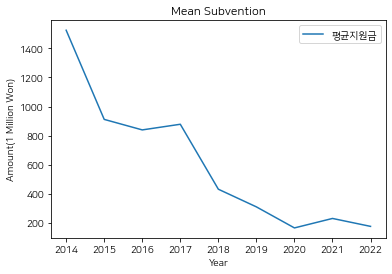

In [20]:
jiwongeum_mean_byyear.plot.line(title = 'Mean Subvention', ylabel = 'Amount(1 Million Won)')

**전통시장 기반 시설 현황 분석**

In [21]:
path2 = '/content/drive/MyDrive/DATA/전통시장현황.csv'
status = pd.read_csv(path2, encoding = 'cp949', index_col =0)
status

,시장유형,주소(도로명),주소(지번),시장개설주기,점포수,취급품목,홈페이지주소,공중화장실보유여부,주차장보유여부
시장(상점가명),,,,,,,,,
강남시장,상설장,서울특별시 강남구 압구정로 2길 46,서울특별시 강남구 신사동 510-11,매일,70,"농산물,축산물,가공식품,의류/신발,기타소매업",NaN,Y,Y
신사상가,상설장,서울특별시 강남구 압구정로29길 72-1,서울특별시 강남구 압구정동 454,매일,90,"농산물,수산물,가공식품,의류/신발",NaN,Y,N
영동전통시장,상설장,서울특별시 강남구 강남대로 128길 20 영동프라자 2동 204호,서울특별시 강남구 논현동 140,매일,110,"축산물,가공식품,의류/신발,기타소매업",NaN,Y,Y
청담삼익시장,상설장,서울특별시 강남구 학동로 101길 26,서울특별시 강남구 청담동 134-20,매일,183,"농산물,축산물,가공식품,의류/신발,기타소매업",NaN,Y,Y
고분다리전통시장,상설장,서울특별시 강동구 구천면로34길 13,서울특별시 강동구 천호동 393-32,매일,106,"농산물,축산물,수산물,가공식품,가정용품",NaN,Y,Y
...,...,...,...,...,...,...,...,...,...
마천전통시장,정기시장,경상남도 함양군 마천면 천왕봉로 1144-2,경상남도 함양군 마천면 가흥리 609-2,5일+10일,11,"가공식품,근린생활서비스",NaN,Y,Y
영등포유통상가,상설장,서울특별시 영등포구 영등포로 109(당산동2가),서울특별시 영등포구 당산동2가 30-2 5층 영등포유통상가,매일,1250,"음식점업,근린생활서비스",NaN,Y,Y
고려쇼핑센터,상설장,부산광역시 사상구 사상로 207,부산광역시 사상구 괘법동 535-11,매일,151,"농산물,가공식품",NaN,Y,Y


In [22]:
status = pd.read_csv(path2, encoding = 'cp949', index_col =0)
status

,시장유형,주소(도로명),주소(지번),시장개설주기,점포수,취급품목,홈페이지주소,공중화장실보유여부,주차장보유여부
시장(상점가명),,,,,,,,,
강남시장,상설장,서울특별시 강남구 압구정로 2길 46,서울특별시 강남구 신사동 510-11,매일,70,"농산물,축산물,가공식품,의류/신발,기타소매업",NaN,Y,Y
신사상가,상설장,서울특별시 강남구 압구정로29길 72-1,서울특별시 강남구 압구정동 454,매일,90,"농산물,수산물,가공식품,의류/신발",NaN,Y,N
영동전통시장,상설장,서울특별시 강남구 강남대로 128길 20 영동프라자 2동 204호,서울특별시 강남구 논현동 140,매일,110,"축산물,가공식품,의류/신발,기타소매업",NaN,Y,Y
청담삼익시장,상설장,서울특별시 강남구 학동로 101길 26,서울특별시 강남구 청담동 134-20,매일,183,"농산물,축산물,가공식품,의류/신발,기타소매업",NaN,Y,Y
고분다리전통시장,상설장,서울특별시 강동구 구천면로34길 13,서울특별시 강동구 천호동 393-32,매일,106,"농산물,축산물,수산물,가공식품,가정용품",NaN,Y,Y
...,...,...,...,...,...,...,...,...,...
마천전통시장,정기시장,경상남도 함양군 마천면 천왕봉로 1144-2,경상남도 함양군 마천면 가흥리 609-2,5일+10일,11,"가공식품,근린생활서비스",NaN,Y,Y
영등포유통상가,상설장,서울특별시 영등포구 영등포로 109(당산동2가),서울특별시 영등포구 당산동2가 30-2 5층 영등포유통상가,매일,1250,"음식점업,근린생활서비스",NaN,Y,Y
고려쇼핑센터,상설장,부산광역시 사상구 사상로 207,부산광역시 사상구 괘법동 535-11,매일,151,"농산물,가공식품",NaN,Y,Y


In [23]:
status.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1401 entries, 강남시장 to Team204
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   시장유형       1401 non-null   object
 1   주소(도로명)    1401 non-null   object
 2   주소(지번)     1401 non-null   object
 3   시장개설주기     1401 non-null   object
 4   점포수        1401 non-null   int64 
 5   취급품목       1401 non-null   object
 6   홈페이지주소     94 non-null     object
 7   공중화장실보유여부  1401 non-null   object
 8   주차장보유여부    1401 non-null   object
dtypes: int64(1), object(8)
memory usage: 109.5+ KB


In [24]:
status.isnull().sum()

시장유형            0
주소(도로명)         0
주소(지번)          0
시장개설주기          0
점포수             0
취급품목            0
홈페이지주소       1307
공중화장실보유여부       0
주차장보유여부         0
dtype: int64

In [25]:
status[['시장유형', '시장개설주기']].value_counts()

시장유형   시장개설주기
상설장    매일        1014
상설+정기  2일+7일       53
       5일+10일      47
       3일+8일       45
       4일+9일       44
정기시장   4일+9일       35
상설+정기  1일+6일       35
정기시장   3일+8일       33
       1일+6일       32
       5일+10일      28
       2일+7일       23
상설+정기  5일           2
정기시장   5일+9일        1
       5일+8일        1
       4일+10일       1
상설+정기  10일+5일       1
정기시장   10일+5일       1
상설+정기  4일+14일       1
       3일+5일        1
       2일+5일        1
       2일+4일        1
정기시장   7일           1
dtype: int64

In [26]:
status[['공중화장실보유여부', '주차장보유여부']].value_counts()

공중화장실보유여부  주차장보유여부
Y          Y          1135
           N           200
N          N            41
           Y            25
dtype: int64

In [28]:
path3 = '/content/drive/MyDrive/DATA/시설현황_기본시설.csv'
basic_facility = pd.read_csv(path3, encoding = 'cp949', index_col = 0)
basic_facility

,전체 (개),소방시설 (%),가스시설 (%),전기배선시설 (%),냉방시설 (%),난방시설 (%),방송시설 (%),공동화장실 (%),아케이드 (%),고객동선통로 (%),실외가로등 (%),엘리베이터/에스컬레이터 (%),CCTV (%),건물실내조명 (%),배수시설 (%),공동수도시설 (%),장애인용 화장실 (%),공동물류창고 (%)
지역별(2020기준),,,,,,,,,,,,,,,,,,
전체,1401,99.9,93.0,98.4,83.3,83.1,81.2,95.3,63.0,72.7,99.1,31.2,90.4,100,97.9,85.0,68.0,13.7
서울,209,100.0,93.8,96.2,80.6,80.6,83.3,91.4,46.9,71.3,96.7,43.7,90.9,100,96.2,36.4,54.5,12.4
부산,168,100.0,91.7,98.8,74.2,74.2,75.6,91.7,44.0,65.5,99.4,28.1,89.3,100,97.0,0.0,32.1,11.9
대구,101,100.0,95.0,100.0,89.8,89.8,75.2,97.0,62.4,79.2,100.0,30.5,91.1,100,100.0,0.0,59.4,9.9
인천,44,100.0,100.0,100.0,100.0,100.0,93.2,93.2,70.5,86.4,100.0,30.0,95.5,100,100.0,0.0,75.0,6.8
광주,24,100.0,95.8,100.0,69.2,61.5,87.5,91.7,62.5,95.8,100.0,15.4,91.7,100,95.8,50.0,87.5,16.7
대전,28,100.0,92.9,100.0,100.0,100.0,89.3,96.4,85.7,92.9,96.4,9.1,96.4,100,100.0,0.0,78.6,7.1
울산,39,97.4,79.5,94.9,71.4,71.4,82.1,100.0,71.8,94.9,97.4,19.0,89.7,100,89.7,80.0,76.9,5.1
세종,4,100.0,100.0,100.0,100.0,100.0,100.0,100.0,75.0,25.0,100.0,0.0,75.0,100,100.0,0.0,75.0,25.0


In [29]:
path4 = '/content/drive/MyDrive/DATA/시설현황_시장편의시설.csv'
accomodation = pd.read_csv(path4, encoding = 'cp949', index_col = 0)
accomodation

,유아놀이방/어린이놀이터 (%),고객휴게실 (%),수유시설 (%),물품보관함 (%),자전거보관소 (%),카트 (%),고객주차장 (%),종합콜센터 (%),문화교실 (%),외국인관광객 안내센터 (%),체육시설 (%),간이도서관 (%),고객지원센터 (%)
지역별(2020기준),,,,,,,,,,,,,
전체,13.3,45.0,15.1,16.7,33.0,22.3,82.8,23.2,21.7,5.2,12.9,12.6,72.8
서울,13.9,45.0,12.9,22.0,21.1,31.6,66.0,32.1,21.5,7.7,10.0,17.7,71.3
부산,6.5,31.0,10.1,8.3,17.9,8.9,60.7,14.3,10.7,3.6,7.1,5.4,52.4
대구,12.9,45.5,18.8,16.8,53.5,12.9,78.2,21.8,16.8,5.9,9.9,13.9,67.3
인천,22.7,59.1,27.3,25.0,50.0,22.7,88.6,45.5,47.7,11.4,13.6,27.3,86.4
광주,8.3,62.5,20.8,33.3,50.0,20.8,95.8,25.0,37.5,12.5,12.5,20.8,87.5
대전,17.9,35.7,14.3,10.7,39.3,53.6,89.3,14.3,32.1,3.6,3.6,3.6,75.0
울산,7.7,53.8,15.4,23.1,15.4,2.6,69.2,15.4,17.9,2.6,5.1,10.3,71.8
세종,25.0,100.0,0.0,50.0,50.0,50.0,100.0,75.0,75.0,0.0,50.0,25.0,100.0


In [30]:
path5 = '/content/drive/MyDrive/DATA/시설현황_시장홍보시설.csv'
public_relations = pd.read_csv(path5, encoding = 'cp949', index_col = 0)
public_relations

,이벤트광장 (%),테마거리 (%),아치/조형물 (%),시장안내도 (%)
지역별(2020기준),,,,
전체,36.6,19.3,72.4,69.7
서울,22.5,12.0,66.5,67.9
부산,16.1,9.5,58.9,69.0
대구,27.7,7.9,80.2,55.4
인천,40.9,22.7,84.1,77.3
광주,41.7,20.8,75.0,83.3
대전,39.3,25.0,75.0,75.0
울산,25.6,12.8,66.7,71.8
세종,75.0,75.0,75.0,75.0


In [31]:
a = pd.merge(basic_facility, accomodation, how='outer', on ='지역별(2020기준)')
facility_status = pd.merge(a, public_relations, how = 'outer', on='지역별(2020기준)' )
facility_status

,전체 (개),소방시설 (%),가스시설 (%),전기배선시설 (%),냉방시설 (%),난방시설 (%),방송시설 (%),공동화장실 (%),아케이드 (%),고객동선통로 (%),...,종합콜센터 (%),문화교실 (%),외국인관광객 안내센터 (%),체육시설 (%),간이도서관 (%),고객지원센터 (%),이벤트광장 (%),테마거리 (%),아치/조형물 (%),시장안내도 (%)
지역별(2020기준),,,,,,,,,,,,,,,,,,,,,
전체,1401,99.9,93.0,98.4,83.3,83.1,81.2,95.3,63.0,72.7,...,23.2,21.7,5.2,12.9,12.6,72.8,36.6,19.3,72.4,69.7
서울,209,100.0,93.8,96.2,80.6,80.6,83.3,91.4,46.9,71.3,...,32.1,21.5,7.7,10.0,17.7,71.3,22.5,12.0,66.5,67.9
부산,168,100.0,91.7,98.8,74.2,74.2,75.6,91.7,44.0,65.5,...,14.3,10.7,3.6,7.1,5.4,52.4,16.1,9.5,58.9,69.0
대구,101,100.0,95.0,100.0,89.8,89.8,75.2,97.0,62.4,79.2,...,21.8,16.8,5.9,9.9,13.9,67.3,27.7,7.9,80.2,55.4
인천,44,100.0,100.0,100.0,100.0,100.0,93.2,93.2,70.5,86.4,...,45.5,47.7,11.4,13.6,27.3,86.4,40.9,22.7,84.1,77.3
광주,24,100.0,95.8,100.0,69.2,61.5,87.5,91.7,62.5,95.8,...,25.0,37.5,12.5,12.5,20.8,87.5,41.7,20.8,75.0,83.3
대전,28,100.0,92.9,100.0,100.0,100.0,89.3,96.4,85.7,92.9,...,14.3,32.1,3.6,3.6,3.6,75.0,39.3,25.0,75.0,75.0
울산,39,97.4,79.5,94.9,71.4,71.4,82.1,100.0,71.8,94.9,...,15.4,17.9,2.6,5.1,10.3,71.8,25.6,12.8,66.7,71.8
세종,4,100.0,100.0,100.0,100.0,100.0,100.0,100.0,75.0,25.0,...,75.0,75.0,0.0,50.0,25.0,100.0,75.0,75.0,75.0,75.0


In [32]:
basic_facility.isnull().sum()

전체 (개)              0
소방시설 (%)            0
가스시설 (%)            0
전기배선시설 (%)          0
냉방시설 (%)            0
난방시설 (%)            0
방송시설 (%)            0
공동화장실 (%)           0
아케이드 (%)            0
고객동선통로 (%)          0
실외가로등 (%)           0
엘리베이터/에스컬레이터 (%)    0
CCTV (%)            0
건물실내조명 (%)          0
배수시설 (%)            0
공동수도시설 (%)          0
장애인용 화장실 (%)        0
공동물류창고 (%)          0
dtype: int64

In [33]:
basic_facility_percentage = basic_facility.drop(['전체 (개)'], axis = 1)
basic_facility_percentage

,소방시설 (%),가스시설 (%),전기배선시설 (%),냉방시설 (%),난방시설 (%),방송시설 (%),공동화장실 (%),아케이드 (%),고객동선통로 (%),실외가로등 (%),엘리베이터/에스컬레이터 (%),CCTV (%),건물실내조명 (%),배수시설 (%),공동수도시설 (%),장애인용 화장실 (%),공동물류창고 (%)
지역별(2020기준),,,,,,,,,,,,,,,,,
전체,99.9,93.0,98.4,83.3,83.1,81.2,95.3,63.0,72.7,99.1,31.2,90.4,100,97.9,85.0,68.0,13.7
서울,100.0,93.8,96.2,80.6,80.6,83.3,91.4,46.9,71.3,96.7,43.7,90.9,100,96.2,36.4,54.5,12.4
부산,100.0,91.7,98.8,74.2,74.2,75.6,91.7,44.0,65.5,99.4,28.1,89.3,100,97.0,0.0,32.1,11.9
대구,100.0,95.0,100.0,89.8,89.8,75.2,97.0,62.4,79.2,100.0,30.5,91.1,100,100.0,0.0,59.4,9.9
인천,100.0,100.0,100.0,100.0,100.0,93.2,93.2,70.5,86.4,100.0,30.0,95.5,100,100.0,0.0,75.0,6.8
광주,100.0,95.8,100.0,69.2,61.5,87.5,91.7,62.5,95.8,100.0,15.4,91.7,100,95.8,50.0,87.5,16.7
대전,100.0,92.9,100.0,100.0,100.0,89.3,96.4,85.7,92.9,96.4,9.1,96.4,100,100.0,0.0,78.6,7.1
울산,97.4,79.5,94.9,71.4,71.4,82.1,100.0,71.8,94.9,97.4,19.0,89.7,100,89.7,80.0,76.9,5.1
세종,100.0,100.0,100.0,100.0,100.0,100.0,100.0,75.0,25.0,100.0,0.0,75.0,100,100.0,0.0,75.0,25.0


In [34]:
basic_facility_percentage['평균'] = basic_facility_percentage.astype('float32').mean(axis = 1)
basic_facility_percentage['평균']

지역별(2020기준)
전체    79.717644
서울    74.994125
부산    69.029411
대구    75.252945
인천    79.447067
광주    77.711769
대전    79.105888
울산    77.717644
세종    75.000000
경기    79.300003
강원    84.070587
충북    79.523521
충남    85.841179
전북    86.611763
전남    81.547058
경북    79.323532
경남    79.247070
제주    81.876472
Name: 평균, dtype: float32

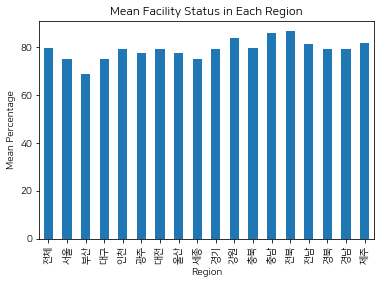

In [35]:
basic_facility_percentage['평균'].plot(kind = 'bar',title = 'Mean Facility Status in Each Region', xlabel = 'Region', ylabel = 'Mean Percentage')

**전통시장 경영현황 분석**

In [38]:
path6 = '/content/drive/MyDrive/DATA/경영현황_시장당일평균매출액.csv'
mean_sales_perday = pd.read_csv(path6, encoding = 'cp949', index_col = 0)
mean_sales_perday = mean_sales_perday.transpose()
mean_sales_perday

,전체 (만원)
2018,5409.2
2019,5749.2
2020,5732.0


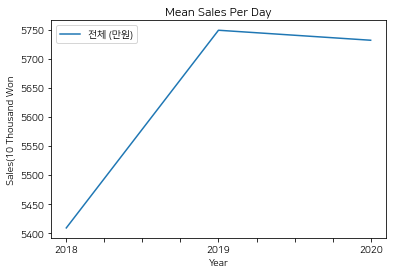

In [39]:
mean_sales_perday.plot(title = 'Mean Sales Per Day', xlabel = 'Year', ylabel = 'Sales(10 Thousand Won')

In [40]:
path7 = '/content/drive/MyDrive/DATA/경영현황_시장당일평균고객수.csv'
mean_visitors_perday = pd.read_csv(path7, encoding = 'cp949', index_col = 0)
mean_visitors_perday = mean_visitors_perday.transpose()
mean_visitors_perday

,전체 (명)
2018,5164.4
2019,5413.2
2020,4723.2


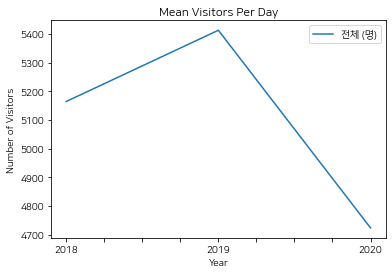

In [41]:
mean_visitors_perday.plot(title = 'Mean Visitors Per Day', xlabel = 'Year', ylabel = 'Number of Visitors')

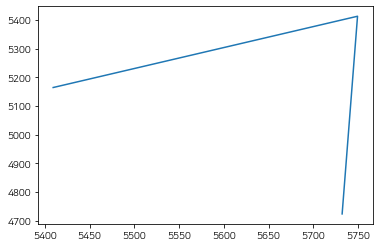

In [44]:
x = np.array([5409.2,5749.2,5732.0])
y = np.array([5164.4,5413.2,4723.2])
plt.plot(x, y)

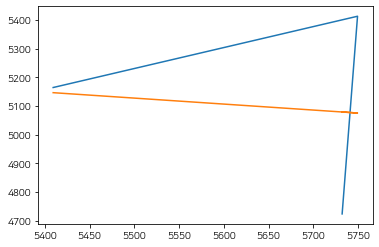

In [46]:
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, y)
plt.plot(x, p(x))